### Part 1: MAP

1. Generate 50 2D-data points using the following function: $y = sin(x^2+1)$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def actual_distribution():
    x = np.arange(0, 1, 1/50)
    y = np.sin(np.power(x,2) + 1)
    return x, y

x, y = actual_distribution() 

2. Add Gaussian random noise to the data

In [2]:
def add_noise(y_curve, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

y_noise = add_noise(y, sigma = 0.05)

3. Show the original curve line and the noisy data.

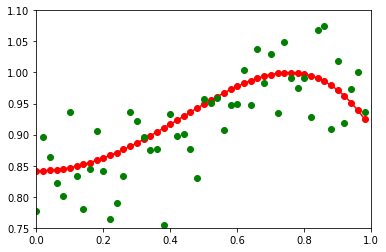

In [3]:
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.axis([0.0, 1.0, 0.75, 1.10])
plt.show()

4. Fit the generated noisy data using the MAP as discussed in class

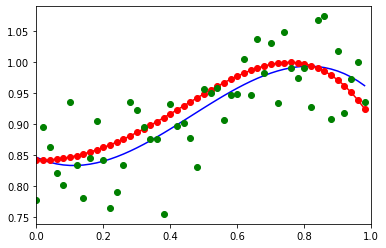

In [4]:
# setup X matrix
def get_input_matrix(x_value, N, M):
    X_input = np.empty([0, N])

    # get the input X matrix
    for m in range(M):
        result_array = np.array([np.power(x, m)])
        X_input = np.append(X_input, result_array, axis = 0)
        
    X_input = np.transpose(X_input)
    return X_input

N = 50 # number of input data
M = 4

X_input = get_input_matrix(x, N, M)

def get_w_least_sq(x_matrix, y_noise):
    w = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y_noise)
    return w

def get_w_map(x_matrix, x, y_noise, N, M, alpha):
    w_least_sq = get_w_least_sq(x_matrix, y_noise)
    
    p = np.poly1d(np.flip(w_least_sq))
    y_lsq = p(x)
    
    # calculate beta
    beta = 0
    for n in range(N):
        beta +=  np.power((y_lsq[n] - y_noise[n]), 2)
    beta = 1 / (beta / N)
    
    # get w for MAP
    w_map = np.linalg.inv(x_matrix.T.dot(x_matrix) + ((alpha / beta) * (np.identity(M)))).dot(x_matrix.T).dot(y_noise)
    return w_map

w_map = get_w_map(X_input, x, y_noise, N, M, alpha = 0.4)

def get_y_estimated(x, w):
    p = np.poly1d(np.flip(w))
    y_estimated = p(x)
    return y_estimated

y_estimated = get_y_estimated(x, w_map)

# construct the polynomial function
plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()


5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [5]:
def get_error_value(y_estimated, y_noise):
    error = 1/2 * (y_estimated - y_noise).T.dot(y_estimated - y_noise)
    return error

error = get_error_value(y_estimated, y_noise)
print(error)

0.06235004468090228


6. Display the estimated values of w

In [6]:
print(w_map)

[ 0.84650956 -0.25128952  1.28592288 -0.92741581]


7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

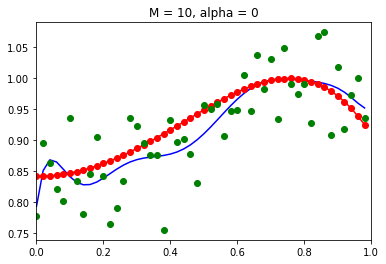

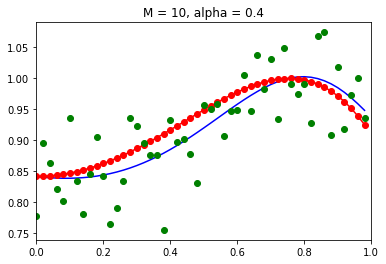

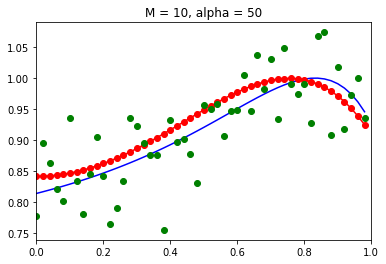

In [7]:
X_input = get_input_matrix(x, N, M = 10)
w1 = get_w_map(X_input, x, y_noise, N, M = 10, alpha = 0)
w2 = get_w_map(X_input, x, y_noise, N, M = 10, alpha = 0.4)
w3 = get_w_map(X_input, x, y_noise, N, M = 10, alpha = 50)

y_estimated_1 = get_y_estimated(x, w1)
y_estimated_2 = get_y_estimated(x, w2)
y_estimated_3 = get_y_estimated(x, w3)

plt.plot(x, y_estimated_1, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 10, alpha = 0")
plt.show()

plt.plot(x, y_estimated_2, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 10, alpha = 0.4")
plt.show()

plt.plot(x, y_estimated_3, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 10, alpha = 50")
plt.show()

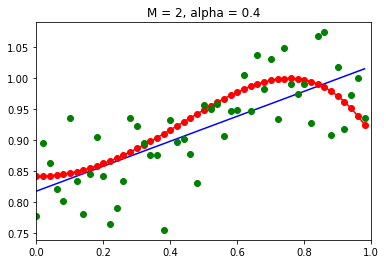

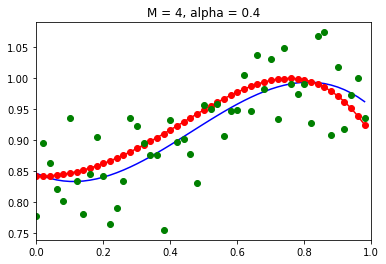

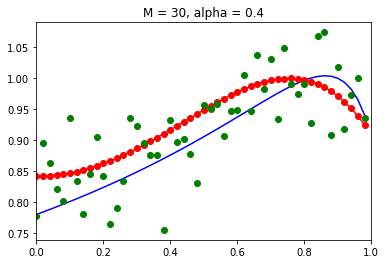

In [8]:
X_input_1 = get_input_matrix(x, N, M = 2)
w1 = get_w_map(X_input_1, x, y_noise, N, M = 2, alpha = 0.4)

X_input_2 = get_input_matrix(x, N, M = 4)
w2 = get_w_map(X_input_2, x, y_noise, N, M = 4, alpha = 0.4)

X_input_3 = get_input_matrix(x, N, M = 30)
w3 = get_w_map(X_input_3, x, y_noise, N, M = 30, alpha = 0.4)

y_estimated_1 = get_y_estimated(x, w1)
y_estimated_2 = get_y_estimated(x, w2)
y_estimated_3 = get_y_estimated(x, w3)

plt.plot(x, y_estimated_1, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 2, alpha = 0.4")
plt.show()

plt.plot(x, y_estimated_2, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 4, alpha = 0.4")
plt.show()

plt.plot(x, y_estimated_3, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.title("M = 30, alpha = 0.4")
plt.show()

8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

In MLE, M indicates the maximum degree of the polynomial curve, and alpha is an coefficient of the regularization term that governs the importance of the regularization term (in MLE, this penalty term is prior) compared with the maximum likelihood term. 

For the regularization term, since we intentionally introduce a prior that assumes that the Gaussian distribution of $w$ has the mean of zero, it is more probable that $\bar{w}$ has fewer effective terms (non-zero terms) rather than more. From a intuitive point of view, this Gaussian distribution that we introduced on $\bar{w}$ "discourages" $\bar{w}$ to take higher dimensionality. The effective number of parameters adapts automatically to the size of the data set.

If alpha is set to be zero, prior - the regularization/penalty term - will have no effect on the likelihood term. From our deriviation in class, we derive that the standard deviation $\sigma^2$ of likelihood distribution is depends significantly on M, which makes the computation of $\sigma^2$ meaningless. Because the error function is a monotonically decreasing function, maximizing the likelihood is equivalent to minimizing the error, thus the likelihood term will render the same effect as the least squares. Therefore, by setting a relatively large M, as indicated in the first graph in #7, $\bar{w}$ will have high dimension and the curve is likely to overfit. 

However, mathematically, if we increase alpha, as it is the numerator of coefficient of the regularization term, it will increase the weight of regularization/prior term. Intuitively, alpha indicates the tolerance to effective terms or, to the same effect, the dimensionality of $\bar{w}$. As alpha increases, the prior becomes less tolerant to the higher dimensionality of $\bar{w}$. Shown in the second in #7, as alpha increases from 0 to 0.4, the curve becomes less likely to be overfitting. In this case, higher alpha surpresses the expression of likelihood, and will make curve less prone to overfit. 

However, if alpha is set relatively too high, as shown in the third graph in #7 (where alpha = 50), because the weight of prior is extremely large, $\bar{w}$ is proned to have very few effective terms / lower dimensionality. If the underlying curve is quite complex, then the prediction curve is likely to underfit when alpha is set too high. 

From the experimentation, we can observe that the prior is very effective in terms of avoiding the overfitting problem. From the fourth to sixth graph in #7, even when M increases to 30, and alpha is 0.4, the curve is still much less likely to be overfitting than without the effect of prior. 





### Part 2: Basis Functions

1. Generate 50 2D-data points using the following function: $y = sin(x^2+1)$

In [9]:
def actual_distribution():
    x = np.arange(0, 1, 1/50);
    y = np.sin(np.power(x,2) + 1);
    return x, y

x, y = actual_distribution() 

2. Add Gaussian random noise to the data

In [10]:
def add_noise(y_curve, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

y_noise = add_noise(y, sigma = 0.05)

3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.

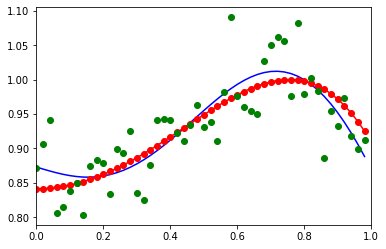

In [11]:
N = 50
M = 4
x_range = 1

s = x_range/(M/2)
miu_vec = np.arange(0, 1, 1/M)

def gaussian_basis(x, miu, s):
    result = np.exp(-np.power((x - miu), 2) / (2 * np.power(s, 2)))
    return result

def get_phi_gaussian(x_vec, miu_vec, s, N, M):
    phi = np.empty([N, M])
    
    # get the input X matrix
    for i, miu in enumerate(miu_vec):
        for j, x_element in enumerate(x):
            phi[j][i] = gaussian_basis(x_element, miu, s)
        
    return phi

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

def get_w_mle_basis(phi, y_noise):
    w_mle = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y_noise)
    return w_mle

w = get_w_mle_basis(phi_matrix, y_noise)

def get_y_estimated(phi, w):
    return phi.dot(w)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.show()



4. Show your results for different values of M that generate overfitting and underfitting curves.

4.1 Overfitting curve when M is too large:

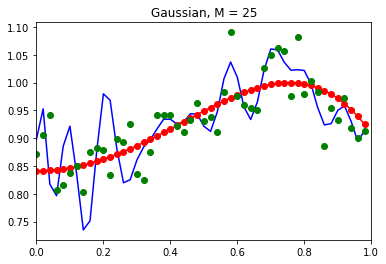

In [12]:
M = 25

s = x_range/(M/2)
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Gaussian, M = 25")
plt.show()


4.2 Underfitting curve when M is too small:

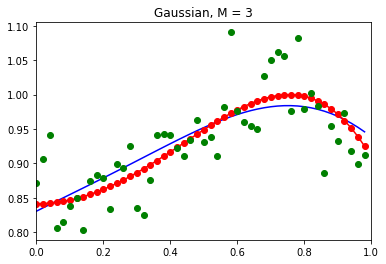

In [13]:
M = 3

s = x_range/(M/2)
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Gaussian, M = 3")
plt.show()


5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

5.1 Overfitting curve when M is too large.

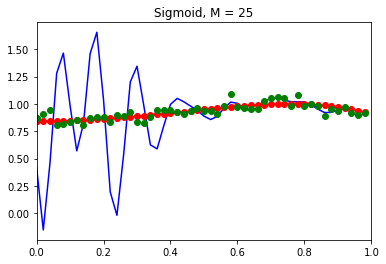

In [14]:
M = 25

s = x_range/(M/2)
miu_vec = np.arange(0, x_range, x_range/M)

def sigmoid_basis(x, miu, s):
    result = 1 / (1 + np.exp(-(x - miu) / s))
    return result

def get_phi_sigmoid(x_vec, miu_vec, s, N, M):
    phi = np.empty([N, M])
    
    # get the input X matrix
    for i, miu in enumerate(miu_vec):
        for j, x_element in enumerate(x):
            phi[j][i] = sigmoid_basis(x_element, miu, s)
        
    return phi

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 25")
plt.show()

5.2 Underfitting curve when M is relatively small.

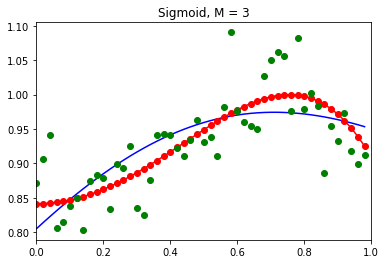

In [15]:
M = 3

s = x_range/(M/2)
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 3")
plt.show()

6. Change the original curve function to $y = 0.4345x^3 - 5.607x^2 + 16.78x - 10.61$, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

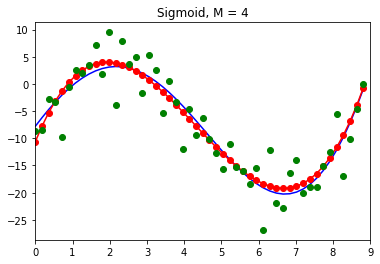

In [16]:
M = 4
x_range = 9

s = x_range/(M/2)
miu_vec = np.arange(0, x_range, x_range/M)

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

x, y = actual_distribution() 

y_noise = add_noise(y, sigma = 4)

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 4")
plt.show()


7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

7.1.1 If $s$ large enough for basis functions (relative to M) to cover the entire range of the input, than the fitting curve is accurate.

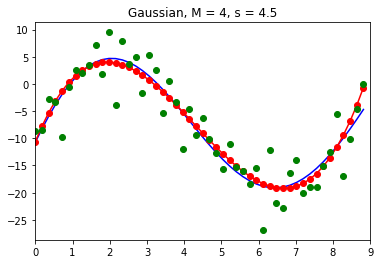

In [17]:
M = 4

s = 4.5
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Gaussian, M = 4, s = 4.5")
plt.show()

7.1.2 Even if s is very large (relative to the range of input and M), the fitting curve is still accurate. It gives a lot of expressiveness for the curve fitting.

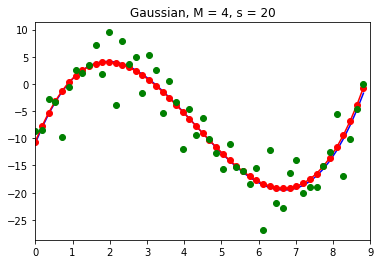

In [18]:
M = 4

s = 20
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Gaussian, M = 4, s = 20")
plt.show()

7.1.3 However, if we set M too small, there will not be enough basis functions to support curve fitting, even if s is relatively large.

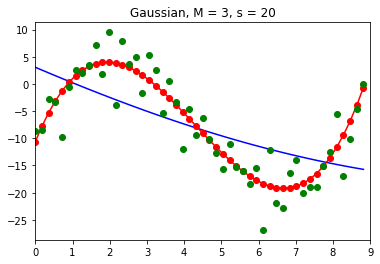

In [19]:
M = 3

s = 20
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Gaussian, M = 3, s = 20")
plt.show()

7.1.4 On the other hand, if we set s too small, the expressiveness of Gaussian basis functions will not be enough to express data inbetween basis. As a result, the accuracy of curve fitting will suffer.

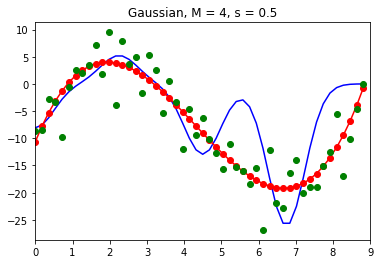

In [20]:
M = 4

s = 0.5
miu_vec = np.arange(0, x_range, x_range/M)

phi_matrix = get_phi_gaussian(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Gaussian, M = 4, s = 0.5")
plt.show()

7.2.1 Similarly, if $s$ large enough for sigmoid basis functions (relative to M) to cover the entire range of the input, than the fitting curve is accurate.

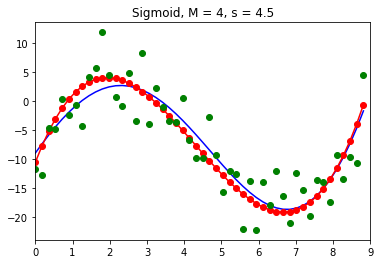

In [21]:
M = 4
x_range = 9

s = 4.5
miu_vec = np.arange(0, x_range, x_range/M)

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

x, y = actual_distribution() 

y_noise = add_noise(y, sigma = 4)

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 4, s = 4.5")
plt.show()


7.2.2 Even if s is very large (relative to the range of input and M), the fitting curve is still accurate. It gives a lot of expressiveness for curve fitting.

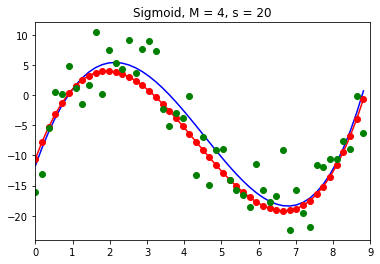

In [22]:
M = 4
x_range = 9

s = 20
miu_vec = np.arange(0, x_range, x_range/M)

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

x, y = actual_distribution() 

y_noise = add_noise(y, sigma = 4)

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 4, s = 20")
plt.show()


7.2.3 However, if we set M too small, there will not be enough basis functions to support curve fitting, even if s is relatively large.

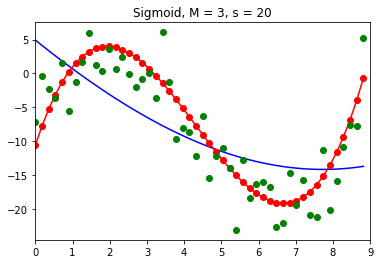

In [23]:
M = 3
x_range = 9

s = 20
miu_vec = np.arange(0, x_range, x_range/M)

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

x, y = actual_distribution() 

y_noise = add_noise(y, sigma = 4)

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 3, s = 20")
plt.show()


7.2.4 On the other hand, if we set s too small, the expressiveness of sigmoid basis functions will not be enough to express data inbetween basis. As a result, the accuracy of curve fitting will suffer.

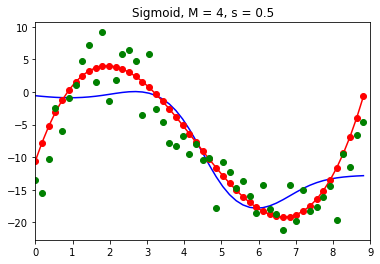

In [24]:
M = 4
x_range = 9

s = 0.5
miu_vec = np.arange(0, x_range, x_range/M)

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

x, y = actual_distribution() 

y_noise = add_noise(y, sigma = 4)

phi_matrix = get_phi_sigmoid(x, miu_vec, s, N, M)

w = get_w_mle_basis(phi_matrix, y_noise)

y_estimated = get_y_estimated(phi_matrix, w)

plt.plot(x, y_estimated, color = 'b')
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, x_range)
plt.title("Sigmoid, M = 4, s = 0.5")
plt.show()


7.3. In general the advantages of these basis functions over polynomial function are that 

1. It is analytically hard to directly input multi-dimensional data into a polynomial function. However, for other basis functions, it's relatively easy to input multi-dimensional data and keeps analytic easiness of the overall function. This is because other basis functions, including Gaussian and Sigmoid functions, are able to input not only $x$, but also input **vector** $x$. For example, for Gaussian basis function, the fucntion can not only take $$\phi_n (x_n) = exp(-\frac{(x_n-\mu_n)^2}{2s^2}),$$ but also $$\phi_n (\bar{x_n}) = exp((\bar{x_n}-\bar{\mu_m})^T \mathbb{S}^{-1}(\bar{x_n}-\bar{\mu_m}))$$ when input is a vector. Yet, overall the data model is still linear model, because this model is still linear in $\bar{w}$. Therefore, the overall model is still analytically easy.

2. Another advantage of these basis functions over polynomial function is that they are more stable numerically than polynomial functions. For example, if M is set to be 50 in polynomial function and $x_i$ term is a relatively large number (e.g.20), then by the nature of exponential, the polynomial term $x_i^50$ will be extremely large. That would mean if the underlying curve is simple (i.e. quadratic), then many $w's$, especially those for higher dimensional terms, will be very small. Therefore, the result will be extremely sensitive to the changes in $\bar{w}$, since even a small changes or error in $\bar{w}$ (those for higher dimensional terms) will lead to a huge error in estimating $\bar{w}$. While for other basis functions, they are less likely to be unstable numercially because they do not suffer from the global effects of certain high dimensional terms.

3. Finally, these basis functions provide more expressiveness than the polynomial functions. Other basis functions gives expressiveness because they allow linear combinations of basis, for which it provides much more complex expressions than simple polynomial curve fitting. For instance, if the underlying curve is complex, polynomial functions may struggle to fit the curve because they are global functions of the input variable, so that changes in one region of input space affect all other regions. However, it will not be a problem for other basis functions. By changing the parameters of the basis functions, we are able to introduce more basis in one region than others, where complexity is more prominant. 